In [37]:
%matplotlib inline

In [38]:
!python SimpleNet/test.py

PNAS Model

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\rayendhahri\anaconda3\envs\machine\lib\site-packages\torchvision\utils.py:68: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.

96 96 54

  warnings.warn(

96 270 108

 25%|██▌       | 1/4 [00:05<00:17,  5.86s/it]

270 540 216

 50%|█████     | 2/4 [00:05<00:08,  4.14s/it]

540 1080 216

100%|██████████| 4/4 [00:06<00:00,  2.92s/it]

1080 1080 216


1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864


In [39]:
!nvidia-smi

Tue Oct  4 20:50:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.89       Driver Version: 465.89       CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   47C    P0    23W /  N/A |   1261MiB /  6144MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [41]:
from IPython.display import Image
import os
img_pth_origin = "images"
img_pth_predicted = "results"
original_image = [(img_pth_origin+'/'+pos_pic) for pos_pic in os.listdir(img_pth_origin) ]#if pos_pic.endswith('.jpg')] # not all are jpg
# for predicted we need same order as the name is maintained this will be easy
predicted = [txt.replace("images", "results") for txt in original_image]


In [42]:
print(original_image)
print(predicted)

['images/0032.png', 'images/220921.jpg', 'images/im.jpeg', 'images/jeuusd992wd41.jpeg']
['results/0032.png', 'results/220921.jpg', 'results/im.jpeg', 'results/jeuusd992wd41.jpeg']


In [43]:
import cv2
impred = cv2.imread(predicted[0])
print(impred.shape)

(256, 256, 3)


In [44]:
#from matplotlib.pyplot import imshow
import numpy as np
for i in range(len(original_image)):
  #print("before")
  im = cv2.imread(original_image[i])                   
  #imS = cv2.resize(im, (250, 250))             

  im_pred = cv2.imread(predicted[i])                    
  #imS_pred = cv2.resize(im_pred, (250, 250))                
  #numpy_horizontal = np.hstack((imS, im_pred))
  #cv2_imshow(imS_pred)
  cv2.imshow("Original", im)
  cv2.imshow("Predicted", im_pred)
  print("\n")

In [45]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

im_list_np= []
for i in original_image: 
  im_list_np.append(Image.open(i))
# Simple augmentation to test predictions
imgs_256 = [torchvision.transforms.Resize(size=(256,256))(im) for im in im_list_np] # randomized after
black_white= [torchvision.transforms.Grayscale()(im) for im in im_list_np]
rot=[torchvision.transforms.RandomInvert()(im) for im in im_list_np]
#rot=[torchvision.transforms.RandomHorizontalFlip(p=0.5)(im) for im in im_list_np]
print(imgs_256)

[<PIL.Image.Image image mode=RGB size=256x256 at 0x199A2DC6310>, <PIL.Image.Image image mode=RGB size=256x256 at 0x199B0A8C400>, <PIL.Image.Image image mode=RGB size=256x256 at 0x199B0CB39A0>, <PIL.Image.Image image mode=RGB size=256x256 at 0x199B0CB33A0>]


In [46]:
# resized 
if not os.path.exists("augmented/images/resized_img"): # will make it to overwrite after
    os.makedirs("augmented/images/resized_img")
if not os.path.exists("augmented/results/results_resized_img"):
    os.makedirs("augmented/results/results_resized_img")
# bw
if not os.path.exists("augmented/images/bw_img"):
    os.makedirs("augmented/images/bw_img")
if not os.path.exists("augmented/results/results_bw_img"):
    os.makedirs("augmented/results/results_bw_img")
# rotation
if not os.path.exists("augmented/images/rot_img"):
    os.makedirs("augmented/images/rot_img")
if not os.path.exists("augmented/results/results_rot_img"):
    os.makedirs("augmented/results/results_rot_img")

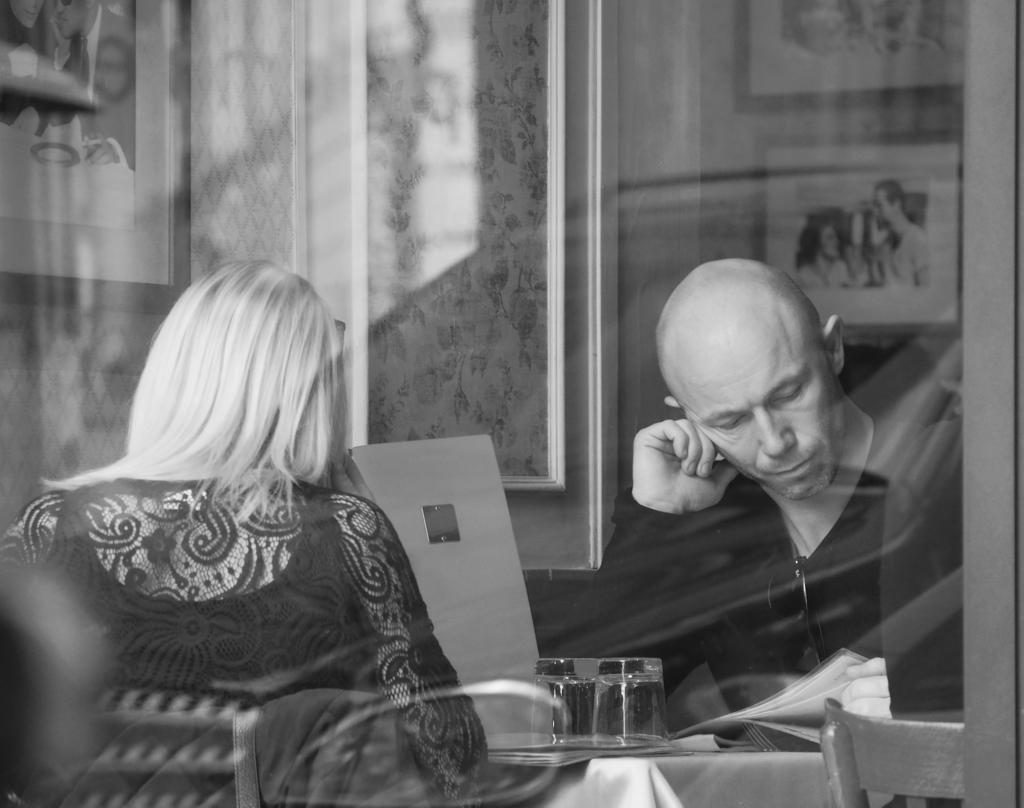

In [47]:
display(black_white[1])

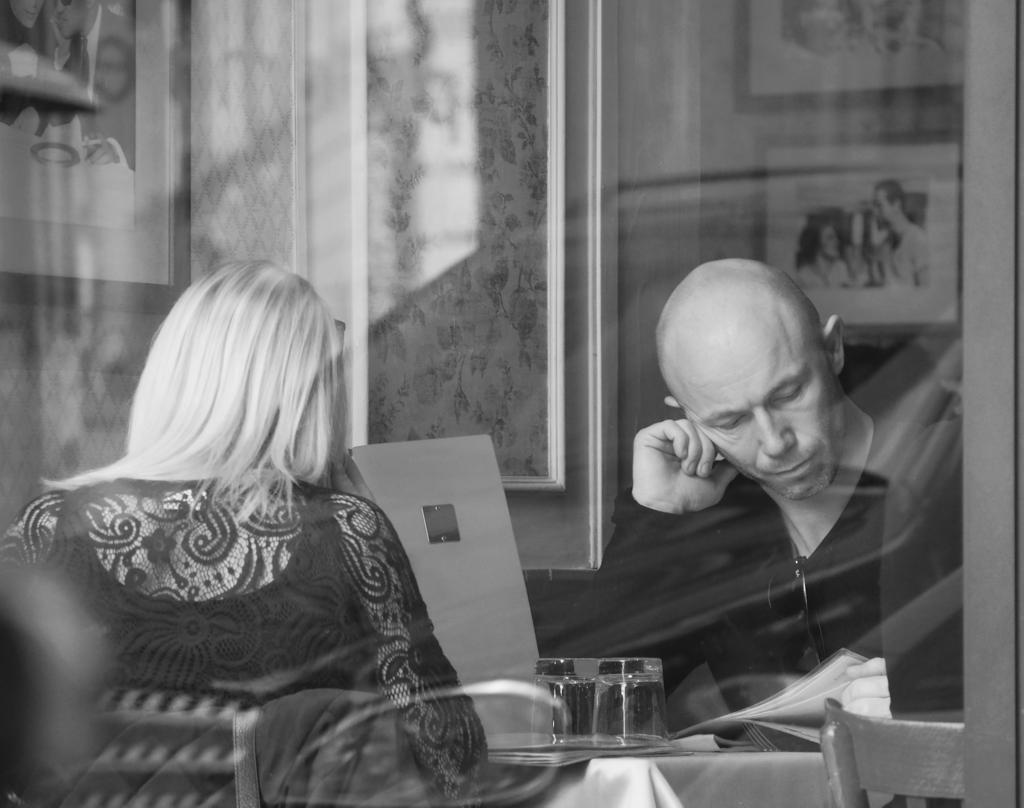

In [48]:
display(rot[1])

In [51]:
for i,j in zip(imgs_256,original_image):
  i.save(j.replace("images", "augmented/images/resized_img"))

for i,j in zip(black_white,original_image):
  i.save(j.replace("images", "augmented/images/bw_img"))

for i,j in zip(rot,original_image):
  i.save(j.replace("images", "augmented/images/rot_img"))

In [52]:
#for bw images
!python SimpleNet/test.py --val_img_dir "augmented/images/bw_img" --results_dir "augmented/results/results_bw_img"


PNAS Model

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\rayendhahri\anaconda3\envs\machine\lib\site-packages\torchvision\utils.py:68: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.

96 96 54

  warnings.warn(

96 270 108

 25%|██▌       | 1/4 [00:05<00:16,  5.55s/it]

270 540 216

 50%|█████     | 2/4 [00:05<00:07,  3.92s/it]

540 1080 216

100%|██████████| 4/4 [00:05<00:00,  2.77s/it]

1080 1080 216


1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864


In [53]:
!python SimpleNet/test.py --val_img_dir "augmented/images/resized_img" --results_dir "augmented/results/results_resized_img"

PNAS Model

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\rayendhahri\anaconda3\envs\machine\lib\site-packages\torchvision\utils.py:68: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.

96 96 54

  warnings.warn(

96 270 108

270 540 216

 25%|██▌       | 1/4 [00:05<00:17,  5.71s/it]

540 1080 216

 75%|███████▌  | 3/4 [00:05<00:04,  4.02s/it]

1080 1080 216

100%|██████████| 4/4 [00:06<00:00,  1.56s/it]

1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864


In [54]:
!python SimpleNet/test.py --val_img_dir "augmented/images/rot_img" --results_dir "augmented/results/results_rot_img"

PNAS Model

  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\rayendhahri\anaconda3\envs\machine\lib\site-packages\torchvision\utils.py:68: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.

96 96 54

  warnings.warn(

96 270 108

270 540 216

 25%|██▌       | 1/4 [00:05<00:16,  5.65s/it]

540 1080 216

 50%|█████     | 2/4 [00:05<00:07,  3.99s/it]

1080 1080 216

100%|██████████| 4/4 [00:05<00:00,  2.82s/it]

1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864


In [56]:
path_resized_same_order= [im.replace("images", "augmented/images/bw_img") for im in original_image]
path_resized_same_order_results= [im.replace("images", "augmented/results/results_bw_img") for im in original_image]

In [57]:
path_bw_same_order= [im.replace("images", "augmented/images/resized_img") for im in original_image]
path_bw_same_order_results= [im.replace("images", "augmented/results/results_resized_img") for im in original_image]

In [58]:
path_rot_same_order= [im.replace("images", "augmented/images/rot_img") for im in original_image]
path_rot_same_order_results= [im.replace("images", "augmented/results/results_rot_img") for im in original_image]

In [59]:
for i in range(len(original_image)):
  #print("before")
  im = cv2.imread(original_image[i])                    
  imS = cv2.resize(im, (250, 250))                

  im_pred = cv2.imread(predicted[i])                    
  imS_pred = cv2.resize(im_pred, (250, 250)) 

  im_black = cv2.imread(path_bw_same_order[i])
  im_black = cv2.resize(im_black, (250, 250))

  im_black_pred = cv2.imread(path_bw_same_order_results[i])
  im_black_pred = cv2.resize(im_black_pred, (250, 250))  

  numpy_horizontal = np.hstack((imS, imS_pred,im_black,im_black_pred))
  #cv2_imshow(imS_pred) 
  cv2.imshow("black",numpy_horizontal)
  cv2.waitKey(0)
  print('\n')

In [60]:
for i in range(len(original_image)):
  #print("before")
  im = cv2.imread(original_image[i])                    
  imS = cv2.resize(im, (250, 250))                

  im_pred = cv2.imread(predicted[i])                    
  imS_pred = cv2.resize(im_pred, (250, 250)) 

  im_res = cv2.imread(path_resized_same_order[i])
  im_res = cv2.resize(im_res, (250, 250))

  im_res_pred = cv2.imread(path_resized_same_order_results[i])
  im_res_pred = cv2.resize(im_res_pred, (250, 250))  

  numpy_horizontal = np.hstack((imS, imS_pred,im_res,im_res_pred))
  #cv2_imshow(imS_pred) 
  cv2.imshow('together',numpy_horizontal)
  cv2.waitKey(0)
  print('\n')

In [61]:
print(path_rot_same_order)
print(path_rot_same_order_results)

['augmented/images/rot_img/0032.png', 'augmented/images/rot_img/220921.jpg', 'augmented/images/rot_img/im.jpeg', 'augmented/images/rot_img/jeuusd992wd41.jpeg']
['augmented/results/results_rot_img/0032.png', 'augmented/results/results_rot_img/220921.jpg', 'augmented/results/results_rot_img/im.jpeg', 'augmented/results/results_rot_img/jeuusd992wd41.jpeg']


In [62]:
for i in range(len(original_image)):
  #print("before")
  im = cv2.imread(original_image[i])                    
  imS = cv2.resize(im, (250, 250))                

  im_pred = cv2.imread(predicted[i])                    
  imS_pred = cv2.resize(im_pred, (250, 250)) 

  im_rot = cv2.imread(path_rot_same_order[i])
  im_rot = cv2.resize(im_rot, (250, 250))

  im_rot_pred = cv2.imread(path_rot_same_order_results[i])
  im_rot_pred = cv2.resize(im_rot_pred, (250, 250))  

  numpy_horizontal = np.hstack((imS, imS_pred,im_rot,im_rot_pred))
  #cv2_imshow(imS_pred) 
  cv2.imshow("rotation",numpy_horizontal)
  cv2.waitKey(0)
  print('\n')

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


Rest will be in the repo